In [1]:
import os
os.chdir('..')

In [2]:
data_folder = '../data/'
server_folder = './server/'
template_folder = './templates/'
figure_folder = '../figures/'

import numpy as np
import json

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns
sns.set(font_scale=1.5)

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
directions = ['grad', 'hess', 'bfgs', 'bfgs-inv', 'hybrid', 'hybrid-inv']
types = ['LS', 'LS-ABS', 'TR', 'TR-ABS']

unfeasible = ['TR_grad', 'TR-ABS_grad', 'LS_hybrid', 'TR_hybrid', 'TR_bfgs-inv', 'TR-ABS_bfgs-inv', 'LS_hybrid-inv', 'TR_hybrid-inv', 'TR-ABS_hybrid-inv']

combinations = []

# Add all combinations
for d in directions:
    for t in types:
        str_ = t + '_' + d
        
        if str_ not in unfeasible:
            combinations.append(str_)

In [4]:
combinations

['LS_grad',
 'LS-ABS_grad',
 'LS_hess',
 'LS-ABS_hess',
 'TR_hess',
 'TR-ABS_hess',
 'LS_bfgs',
 'LS-ABS_bfgs',
 'TR_bfgs',
 'TR-ABS_bfgs',
 'LS_bfgs-inv',
 'LS-ABS_bfgs-inv',
 'LS-ABS_hybrid',
 'TR-ABS_hybrid',
 'LS-ABS_hybrid-inv']

In [5]:
models = ['SM_MNL', 
          'SM_Nested',
          'LPMC_MNL_DC_S', 
          'LPMC_MNL_DC_M', 
          'LPMC_MNL_DC_L',
          'LPMC_MNL_RR_S',
          'LPMC_MNL_RR_M',
          'LPMC_MNL_RR_L',
          'LPMC_MNL_Full_S',
          'LPMC_MNL_Full_M',
          'LPMC_MNL_Full_L',
          'MTMC_MNL']

In [6]:
interest = 'time'

In [7]:
res = np.zeros((len(combinations), len(models)))

for j, mod in enumerate(models):
    for i, comb in enumerate(combinations):
        with open(server_folder + mod + '/results/' + comb + '.json', 'r') as infile:
            data = json.load(infile)
            
        res[i,j] = np.mean(data[interest])
        
min_col = np.min(res, axis=0)

for k in range(len(models)):
    res[:,k] = res[:,k]/min_col[k]

In [8]:
points = list(range(1,11))

perf = np.zeros((len(combinations), len(points)))

for j, pi in enumerate(points):
        
    for i in range(len(combinations)):
        
        perf[i,j] = np.sum(res[i,:] <= pi)/len(res[i,:])

In [9]:
cm = plt.get_cmap('Greys') 
c_norm  = colors.Normalize(vmin=-1, vmax=6)
scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cm)

In [10]:
dir_to_val = {'grad': 1,
              'hess': 2, 
              'bfgs': 3, 
              'bfgs-inv': 4,
              'hybrid': 5,
              'hybrid-inv': 6}

type_to_style = {'LS': '-',
                 'LS-ABS': '--',
                 'TR': '-.',
                 'TR-ABS': ':'}

In [11]:
dirs = ['grad', 'hess', 'bfgs', 'bfgs-inv', 'hybrid', 'hybrid-inv']
dir_to_str = {'grad': 'Gradient',
              'hess': 'Hessian',
              'bfgs': 'BFGS',
              'bfgs-inv': 'BFGS$^{-1}$',
              'hybrid': 'Hybrid',
              'hybrid-inv': 'Hybrid$^{-1}$'}

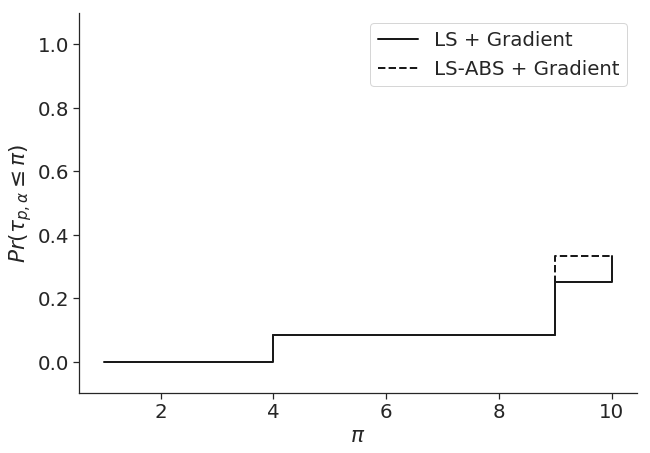

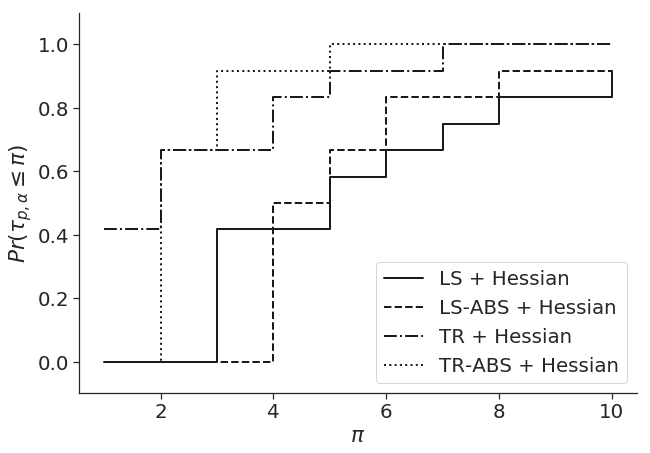

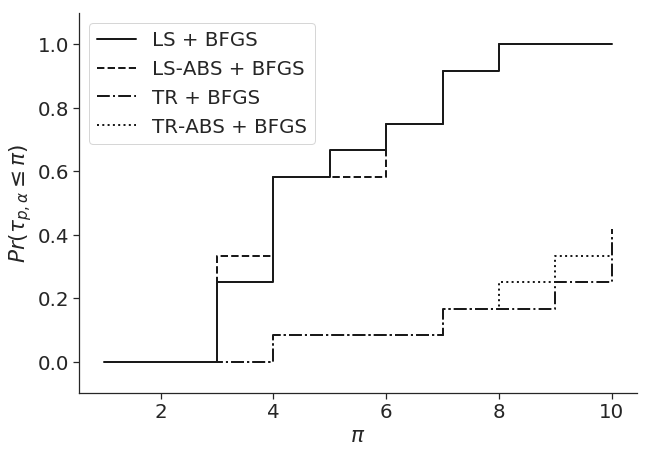

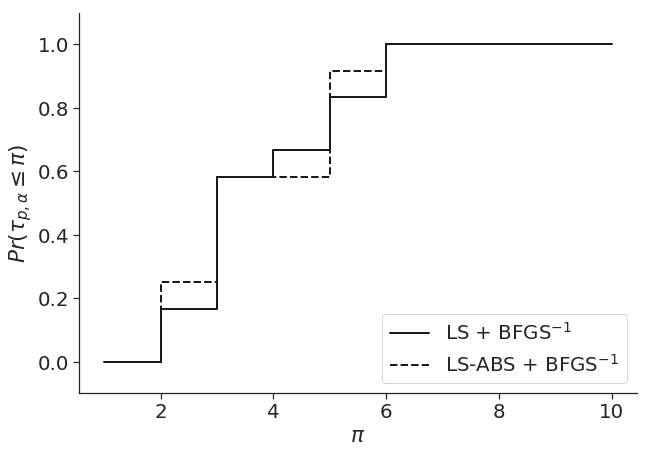

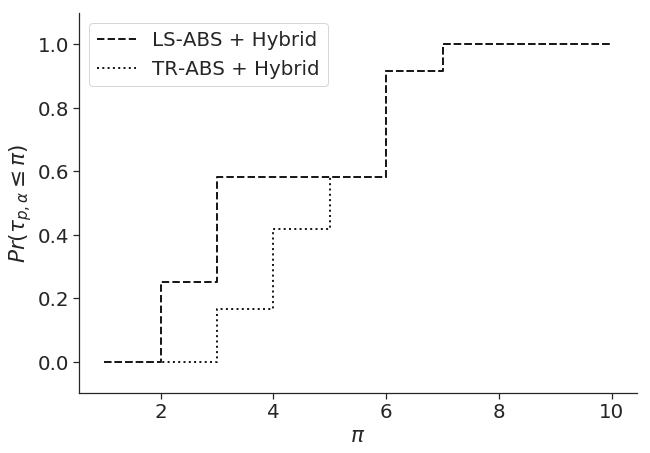

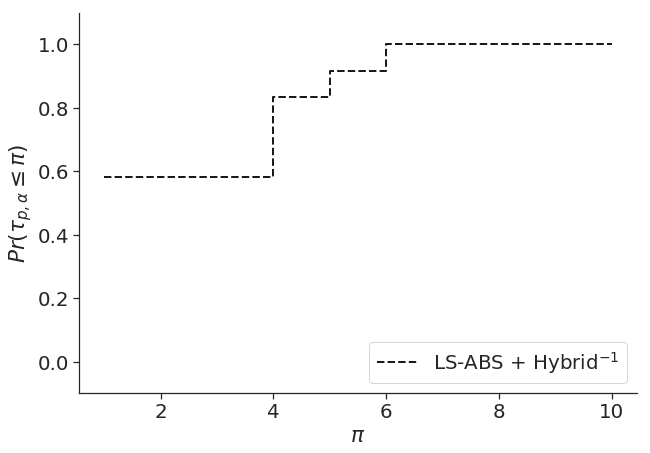

In [12]:
for d in dirs:

    plt.figure(figsize=(10, 7), frameon=False)

    sns.set_context("paper")
    sns.set(font_scale = 1.8)
    sns.set_style("white", {
        "font.family": "sans-serif",
        "font.serif": ['Helvetica'],
    })
    sns.set_style("ticks", {"xtick.major.size": 4,
                            "ytick.major.size": 4})

    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    for i, c in enumerate(combinations):
        
        if d == c.split('_')[1]:
            #color_val = scalar_map.to_rgba(dir_to_val[c.split('_')[1]])
            style = type_to_style[c.split('_')[0]]
            
            label = c.split('_')[0] + ' + ' + dir_to_str[c.split('_')[1]]
            
            plt.step(points, perf[i,:], where='post', linestyle=style, linewidth=2, color='k', label=label)
    
    if d == 'hybrid-inv':
        plt.legend(loc='lower right')
    else:     
        plt.legend()
    plt.xlabel('$\pi$')
    plt.ylabel('$Pr(\\tau_{p,\\alpha} \leq \pi)$')
    plt.ylim([-0.1, 1.1])
    
    plt.savefig(figure_folder + 'png/perf_profile_' + d + '.png', bbox_inches='tight')
    plt.savefig(figure_folder + 'pdf/perf_profile_' + d + '.pdf', bbox_inches='tight')

In [13]:
groups = [['LS_grad', 'LS-ABS_grad'], 
          ['LS_hess', 'LS-ABS_hess'], 
          ['TR_hess', 'TR-ABS_hess'], 
          ['LS_bfgs', 'LS-ABS_bfgs'],
          ['TR_bfgs', 'TR-ABS_bfgs'],
          ['LS_bfgs-inv', 'LS-ABS_bfgs-inv']]

filenames = ['ls_grad', 'ls_hess', 'tr_hess', 'ls_bfgs', 'tr_bfgs', 'ls_bfgs_inv']

to_add = ['LS-ABS_hybrid', 'TR-ABS_hybrid']
best = 'LS-ABS_hybrid-inv'

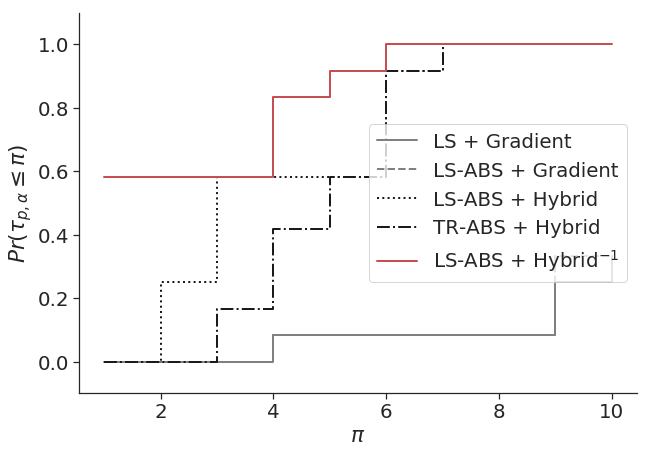

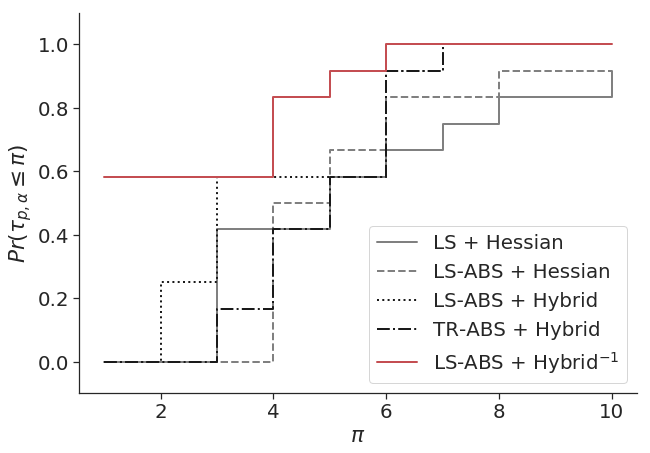

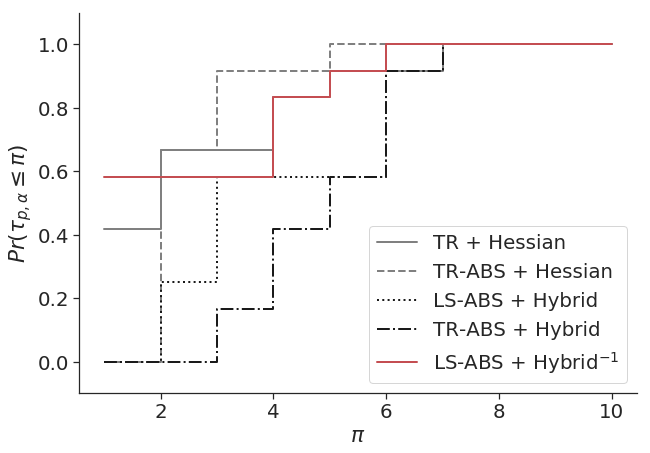

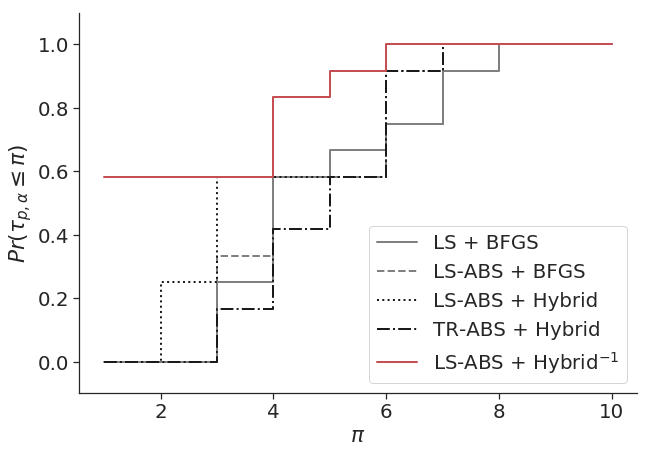

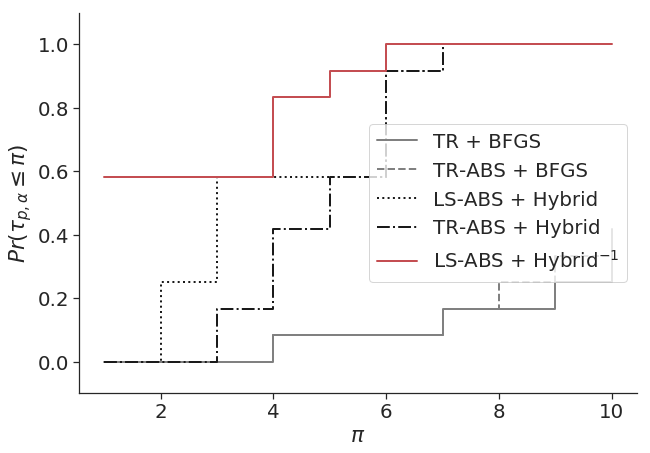

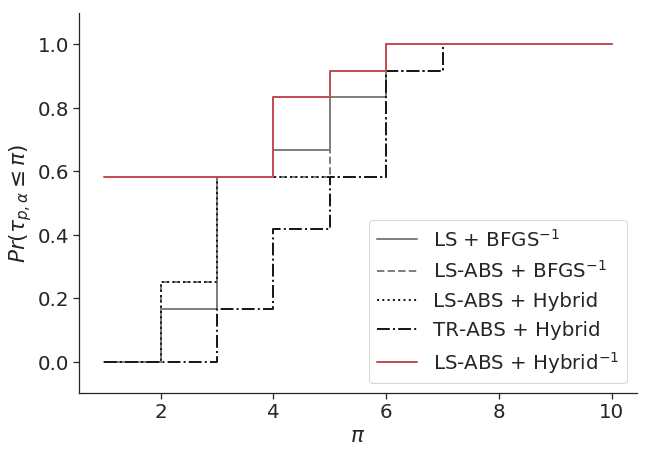

In [14]:
for f, g in zip(filenames, groups):
    
    plt.figure(figsize=(10, 7), frameon=False)

    sns.set_context("paper")
    sns.set(font_scale = 1.8)
    sns.set_style("white", {
        "font.family": "sans-serif",
        "font.serif": ['Helvetica'],
    })
    sns.set_style("ticks", {"xtick.major.size": 4,
                            "ytick.major.size": 4})

    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    for i, c in enumerate(combinations):
        
        if c in g:

            label = c.split('_')[0] + ' + ' + dir_to_str[c.split('_')[1]]

            if 'ABS' in c:
                style = '--'
            else:
                style = '-'

            plt.step(points, perf[i,:], where='post', linestyle=style, linewidth=2, color='gray', label=label)
            
    for i, c in enumerate(combinations):
        
        if c in to_add:

            label = c.split('_')[0] + ' + ' + dir_to_str[c.split('_')[1]]

            if 'LS' in c:
                style = ':'
            else:
                style = '-.'

            plt.step(points, perf[i,:], where='post', linestyle=style, linewidth=2, color='k', label=label)
   
    for i, c in enumerate(combinations):
        
        if c == best:

            label = c.split('_')[0] + ' + ' + dir_to_str[c.split('_')[1]]

            plt.step(points, perf[i,:], where='post', linestyle='-', linewidth=2, color='r', label=label)

    plt.legend()
    plt.xlabel('$\pi$')
    plt.ylabel('$Pr(\\tau_{p,\\alpha} \leq \pi)$')
    plt.ylim([-0.1, 1.1])
    
    plt.savefig(figure_folder + 'png/perf_profile_' + f + '.png', bbox_inches='tight')
    plt.savefig(figure_folder + 'pdf/perf_profile_' + f + '.pdf', bbox_inches='tight')

In [17]:
groups = [['LS_grad', 'LS-ABS_grad'], 
          ['LS_hess', 'LS-ABS_hess'], 
          ['TR_hess', 'TR-ABS_hess'], 
          ['LS_bfgs', 'LS-ABS_bfgs'],
          ['TR_bfgs', 'TR-ABS_bfgs'],
          ['LS_bfgs-inv', 'LS-ABS_bfgs-inv'],
          ['LS-ABS_hybrid', 'TR-ABS_hybrid']]

filenames = ['ls_grad', 'ls_hess', 'tr_hess', 'ls_bfgs', 'tr_bfgs', 'ls_bfgs_inv', 'hybrid']

best = 'LS-ABS_hybrid-inv'

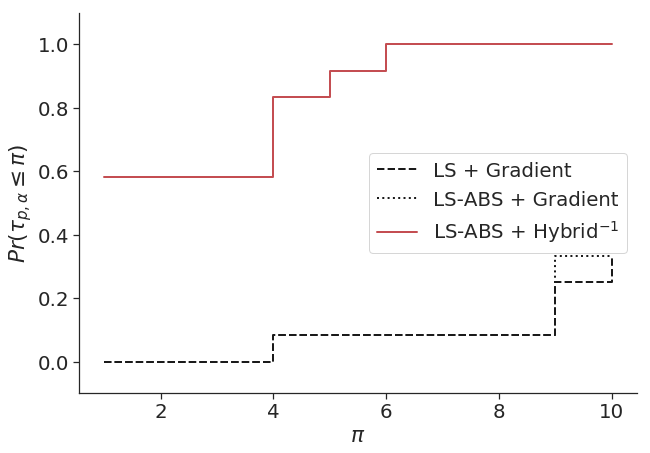

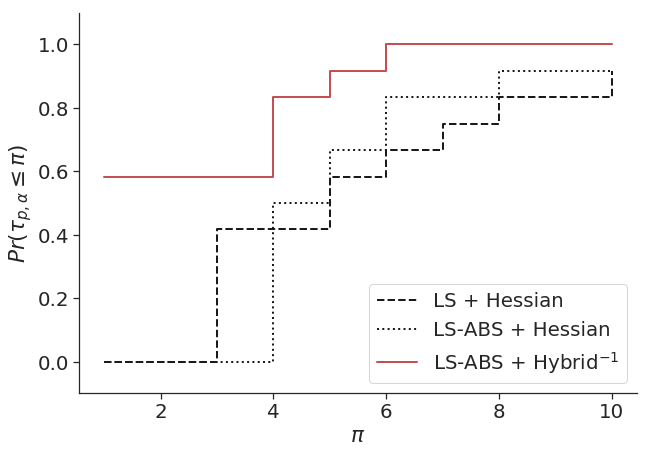

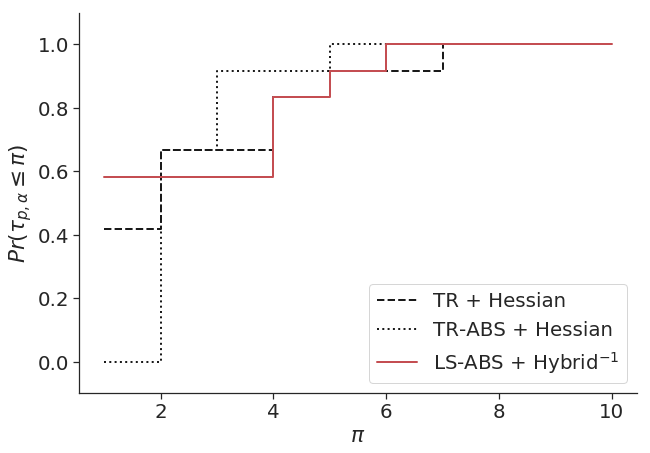

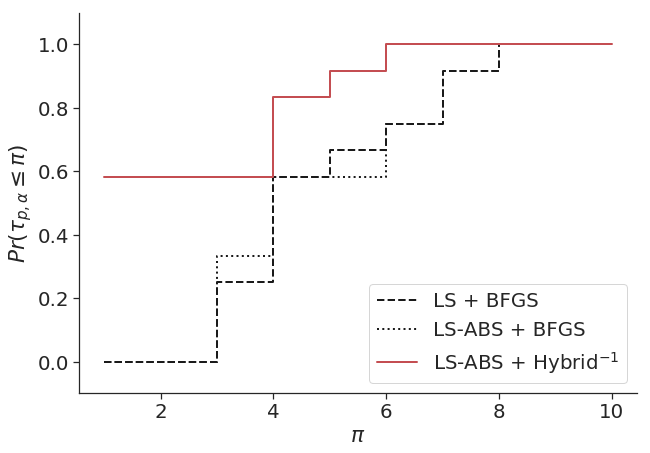

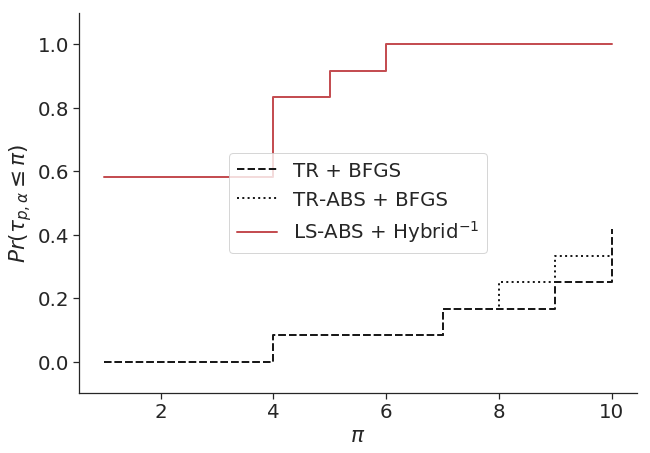

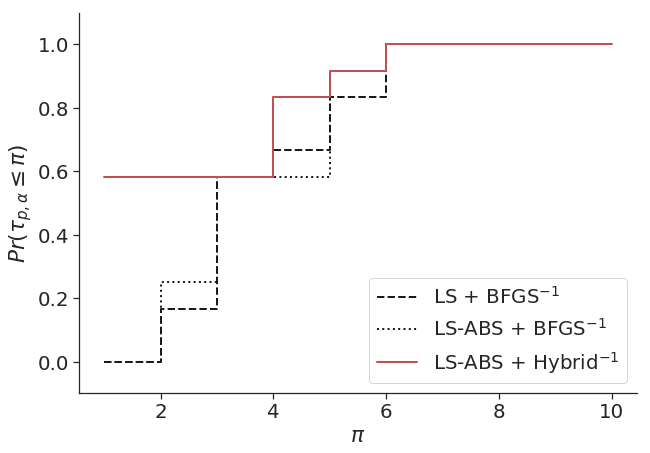

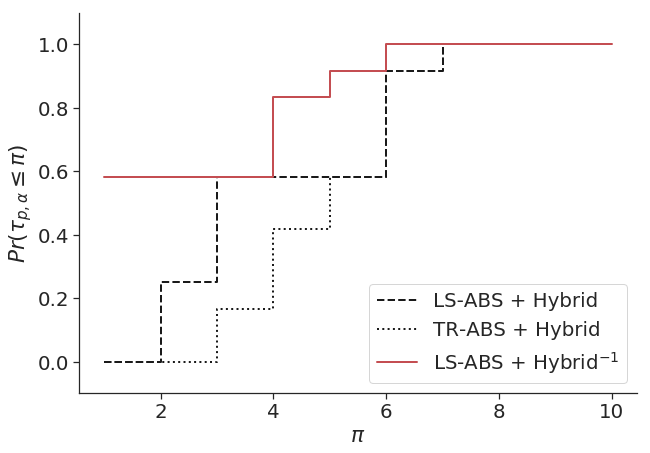

In [18]:
for f, g in zip(filenames, groups):
    
    plt.figure(figsize=(10, 7), frameon=False)

    sns.set_context("paper")
    sns.set(font_scale = 1.8)
    sns.set_style("white", {
        "font.family": "sans-serif",
        "font.serif": ['Helvetica'],
    })
    sns.set_style("ticks", {"xtick.major.size": 4,
                            "ytick.major.size": 4})

    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    for i, c in enumerate(combinations):
        
        if c in g:

            label = c.split('_')[0] + ' + ' + dir_to_str[c.split('_')[1]]
            
            if 'hybrid' not in c:
                if 'ABS' in c:
                    style = ':'
                else:
                    style = '--'
            else:
                if 'TR' in c:
                    style = ':'
                else:
                    style = '--'  

            plt.step(points, perf[i,:], where='post', linestyle=style, linewidth=2, color='k', label=label)
   
    for i, c in enumerate(combinations):
        
        if c == best:

            label = c.split('_')[0] + ' + ' + dir_to_str[c.split('_')[1]]

            plt.step(points, perf[i,:], where='post', linestyle='-', linewidth=2, color='r', label=label)

    plt.legend()
    plt.xlabel('$\pi$')
    plt.ylabel('$Pr(\\tau_{p,\\alpha} \leq \pi)$')
    plt.ylim([-0.1, 1.1])
    
    plt.savefig(figure_folder + 'png/perf_profile_' + f + '2.png', bbox_inches='tight')
    plt.savefig(figure_folder + 'pdf/perf_profile_' + f + '2.pdf', bbox_inches='tight')